In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.callbacks import EarlyStopping
from keras.regularizers import L1L2
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

In [2]:
# Load data
df = pd.read_csv('./Metals_and_Mining_mod.csv')

# Replace null values with 0
df.fillna(0, inplace=True)

# Print the data
print(df)

            Date    Symbol Series  Prev Close    Open    High     Low    Last  \
0     2015-01-01      VEDL     EQ      214.50  213.70  219.70  212.20  219.20   
1     2015-01-02      VEDL     EQ      219.25  219.35  224.45  219.35  222.40   
2     2015-01-05      VEDL     EQ      222.30  222.50  225.30  218.10  219.50   
3     2015-01-06      VEDL     EQ      219.80  217.95  219.50  206.75  208.10   
4     2015-01-07      VEDL     EQ      209.05  209.00  211.85  204.15  209.05   
...          ...       ...    ...         ...     ...     ...     ...     ...   
6259  2021-04-26  JSWSTEEL     EQ      635.40  642.00  660.70  638.25  657.00   
6260  2021-04-27  JSWSTEEL     EQ      655.80  660.65  670.35  658.00  666.35   
6261  2021-04-28  JSWSTEEL     EQ      665.90  669.75  676.00  650.65  662.50   
6262  2021-04-29  JSWSTEEL     EQ      662.65  672.00  728.90  668.05  726.20   
6263  2021-04-30  JSWSTEEL     EQ      726.50  719.60  740.00  711.45  713.70   

       Close    VWAP    Vol

In [3]:

df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', inplace=True)

In [4]:
# Function for calculating the metrics of a model trained on a particular stock in the sector.
def stockMetrics(y_test, predictions):
    # Calculate metrics
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, predictions)
    nrmse = rmse / (np.max(y_test) - np.min(y_test))
    actual_growth = ((y_test[-1][0] - y_test[0][0]) / y_test[0][0]) * 100
    predicted_growth = ((predictions[-1][0] - predictions[0][0]) / predictions[0][0]) * 100
    
    return mse, rmse, mae, nrmse, actual_growth, predicted_growth

In [5]:
# Function for plotting the Actual vs Predicted Growth of each stock in a sector.
def stockActVsPred(stock_df, y_test, predictions):
    # Plot actual vs predicted values
    plt.figure(figsize=(10, 6))
    plt.plot(stock_df['Date'][len(stock_df)-len(predictions):], y_test, label='Actual')
    plt.plot(stock_df['Date'][len(stock_df)-len(predictions):], predictions, label='Predicted')
    plt.title(f'Actual vs Predicted Stock Closing Prices for {symbol}')
    plt.xlabel('Date')
    plt.ylabel('Stock Closing Price')
    plt.legend()
    plt.show()

Epoch 1/10
29/29 [==============================] - 6s 59ms/step - loss: 0.0158 - val_loss: 0.0023
Epoch 2/10
29/29 [==============================] - 1s 28ms/step - loss: 0.0031 - val_loss: 0.0013
Epoch 3/10
29/29 [==============================] - 1s 31ms/step - loss: 0.0030 - val_loss: 0.0012
Epoch 4/10
29/29 [==============================] - 1s 30ms/step - loss: 0.0026 - val_loss: 0.0011
Epoch 5/10
29/29 [==============================] - 1s 28ms/step - loss: 0.0026 - val_loss: 0.0011
Epoch 6/10
29/29 [==============================] - 1s 27ms/step - loss: 0.0026 - val_loss: 0.0016
Epoch 7/10
29/29 [==============================] - 1s 30ms/step - loss: 0.0023 - val_loss: 0.0010
Epoch 8/10
29/29 [==============================] - 1s 33ms/step - loss: 0.0019 - val_loss: 0.0010
Epoch 9/10
29/29 [==============================] - 1s 33ms/step - loss: 0.0019 - val_loss: 9.9917e-04
Epoch 10/10
8/8 [==============================] - 1s 11ms/step
Metrics of TATASTEEL:
MSE: 1723.537154259

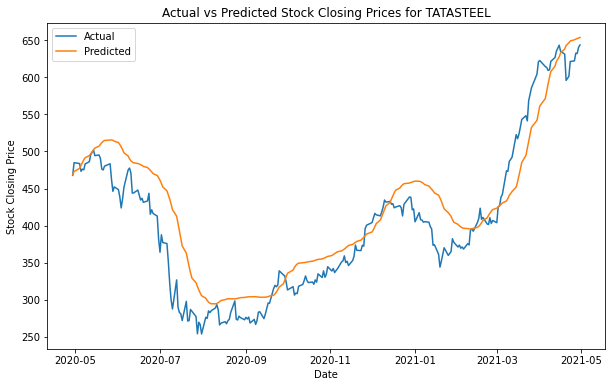

Epoch 1/10
29/29 [==============================] - 7s 74ms/step - loss: 0.0270 - val_loss: 8.9549e-05
Epoch 2/10
29/29 [==============================] - 1s 32ms/step - loss: 0.0081 - val_loss: 1.0765e-04
Epoch 3/10
29/29 [==============================] - 1s 31ms/step - loss: 0.0077 - val_loss: 9.0871e-05
Epoch 4/10
29/29 [==============================] - 1s 33ms/step - loss: 0.0073 - val_loss: 5.1449e-04
Epoch 5/10
29/29 [==============================] - 1s 32ms/step - loss: 0.0067 - val_loss: 5.7190e-04
Epoch 6/10
29/29 [==============================] - 1s 33ms/step - loss: 0.0086 - val_loss: 1.5828e-04
Epoch 7/10
29/29 [==============================] - 1s 32ms/step - loss: 0.0060 - val_loss: 2.1218e-04
Epoch 8/10
29/29 [==============================] - 1s 35ms/step - loss: 0.0054 - val_loss: 4.2709e-04
Epoch 9/10
29/29 [==============================] - 1s 32ms/step - loss: 0.0057 - val_loss: 1.0440e-04
Epoch 10/10
8/8 [==============================] - 1s 10ms/step
Metrics o

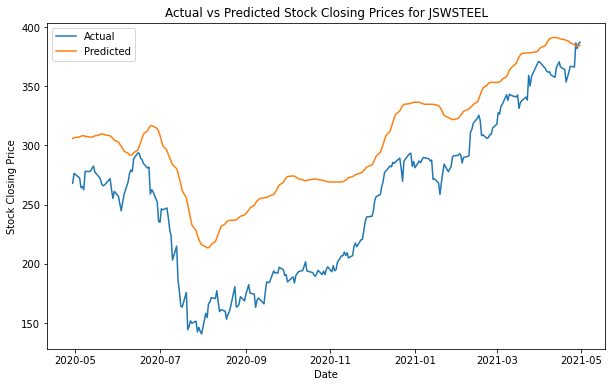

Epoch 1/10
29/29 [==============================] - 6s 65ms/step - loss: 0.0502 - val_loss: 0.0062
Epoch 2/10
29/29 [==============================] - 1s 29ms/step - loss: 0.0115 - val_loss: 0.0081
Epoch 3/10
29/29 [==============================] - 1s 29ms/step - loss: 0.0072 - val_loss: 0.0015
Epoch 4/10
29/29 [==============================] - 1s 29ms/step - loss: 0.0060 - val_loss: 0.0027
Epoch 5/10
29/29 [==============================] - 1s 31ms/step - loss: 0.0060 - val_loss: 0.0015
Epoch 6/10
29/29 [==============================] - 1s 33ms/step - loss: 0.0051 - val_loss: 0.0015
Epoch 7/10
29/29 [==============================] - 1s 31ms/step - loss: 0.0059 - val_loss: 0.0017
Epoch 8/10
29/29 [==============================] - 1s 32ms/step - loss: 0.0047 - val_loss: 0.0015
Epoch 9/10
29/29 [==============================] - 1s 32ms/step - loss: 0.0053 - val_loss: 0.0015
Epoch 10/10
8/8 [==============================] - 1s 9ms/step
Metrics of VEDL:
MSE: 216.43363851850305, RMSE

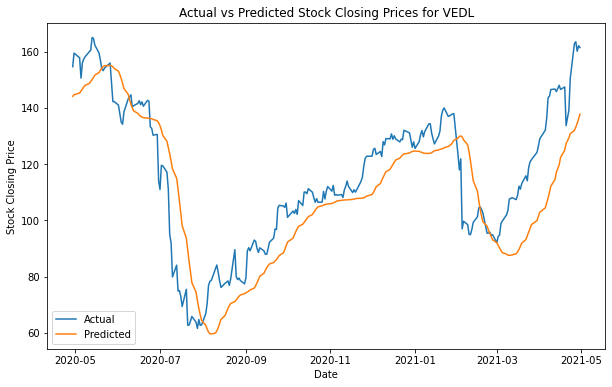

Epoch 1/10
29/29 [==============================] - 6s 61ms/step - loss: 0.0253 - val_loss: 0.0018
Epoch 2/10
29/29 [==============================] - 1s 31ms/step - loss: 0.0043 - val_loss: 0.0013
Epoch 3/10
29/29 [==============================] - 1s 31ms/step - loss: 0.0034 - val_loss: 7.7031e-04
Epoch 4/10
29/29 [==============================] - 1s 32ms/step - loss: 0.0027 - val_loss: 0.0010
Epoch 5/10
29/29 [==============================] - 1s 30ms/step - loss: 0.0027 - val_loss: 7.2404e-04
Epoch 6/10
29/29 [==============================] - 1s 40ms/step - loss: 0.0028 - val_loss: 7.9274e-04
Epoch 7/10
29/29 [==============================] - 1s 30ms/step - loss: 0.0028 - val_loss: 0.0012
Epoch 8/10
29/29 [==============================] - 1s 29ms/step - loss: 0.0025 - val_loss: 8.9083e-04
Epoch 9/10
29/29 [==============================] - 1s 30ms/step - loss: 0.0023 - val_loss: 9.5625e-04
Epoch 10/10
8/8 [==============================] - 1s 11ms/step
Metrics of HINDALCO:
MSE:

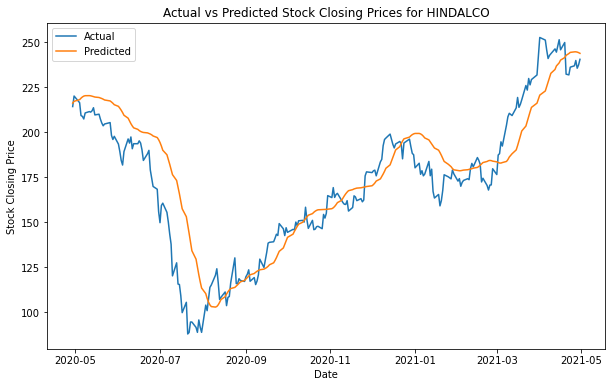

"for symbol, metrics in stock_metrics.items():\n    print(f'Stock: {symbol}, Metrics: {metrics}', sep = '\n')"

In [6]:
# Calculate rolling mean and standard deviation for the 'Close' column
df['50_day_mean'] = df['Close'].rolling(window=50).mean()
df['200_day_mean'] = df['Close'].rolling(window=200).mean()
df['50_day_std'] = df['Close'].rolling(window=50).std()
df['200_day_std'] = df['Close'].rolling(window=200).std()

# Drop rows with NaN values resulting from rolling calculations
df.dropna(inplace=True)

# Define features and target
features = ['Open', 'High', 'Low', 'Close', '50_day_mean', '200_day_mean', '50_day_std', '200_day_std']
target = 'Close'

# Initialize MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Dictionary to store metrics for each stock
stock_metrics = {}

# Process each stock
for symbol in df['Symbol'].unique():
    stock_df = df[df['Symbol'] == symbol].copy()
    
    # Scale features
    scaled_features = scaler.fit_transform(stock_df[features])
    scaled_target = scaler.fit_transform(stock_df[[target]])
    
    X, y = [], []
    dates = []  # List to store the corresponding dates for X and y
    time_steps = 30
    for i in range(time_steps, len(stock_df)):
        X.append(scaled_features[i-time_steps:i])
        y.append(scaled_target[i])
        dates.append(stock_df['Date'].iloc[i])  # Store the corresponding date
        
    X=np.array(X)
    y=np.array(y)
    
    # Convert dates list to a NumPy array for easier indexing
    dates = np.array(dates)
    
    '''# Create sequences
    def create_dataset(X, y, time_steps=1):
        Xs, ys = [], []
        for i in range(len(X) - time_steps):
            Xs.append(X[i:(i + time_steps)])
            ys.append(y[i + time_steps])
        return np.array(Xs), np.array(ys)

    time_steps = 30
    X, y = create_dataset(scaled_features, scaled_target, time_steps)'''
    
    # Split into training and testing datasets based on the specified dates
    '''train_mask = stock_df['Date'] < pd.Timestamp('2020-01-01')
    test_mask = (stock_df['Date'] >= pd.Timestamp('2020-01-01')) & (stock_df['Date'] < pd.Timestamp('2021-01-01'))
    X_train, X_test = X[train_mask], X[test_mask]
    y_train, y_test = y[train_mask], y[test_mask]'''
    
    # Now create masks based on the adjusted dates array
    train_mask = dates < pd.Timestamp('2020-01-01')
    test_mask = (dates >= pd.Timestamp('2020-01-01')) & (dates < pd.Timestamp('2021-01-01'))
    
    # Use these masks to split the data
    X_train, X_test = X[train_mask], X[test_mask]
    y_train, y_test = y[train_mask], y[test_mask]
    
    # Build the LSTM model
    model = Sequential([
        LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
        Dropout(0.2),
        LSTM(50, return_sequences=True),
        Dropout(0.2),
        LSTM(50),
        Dropout(0.2),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    # Fit the model
    early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, callbacks=[early_stop], verbose=1)
    
    # Make predictions
    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions)
    y_test = scaler.inverse_transform(y_test)
    
    '''# Calculate metrics
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, predictions)
    nrmse = rmse / (np.max(y_test) - np.min(y_test))
    actual_growth = ((y_test[-1][0] - y_test[0][0]) / y_test[0][0]) * 100
    predicted_growth = ((predictions[-1][0] - predictions[0][0]) / predictions[0][0]) * 100'''
    
    mse, rmse, mae, nrmse, actual_growth, predicted_growth = stockMetrics(y_test, predictions)
    
    # Store metrics
    stock_metrics[symbol] = {
        'MSE': mse,
        'RMSE': rmse,
        'NRMSE': nrmse,
        'MAE': mae,
        'Actual Growth %': actual_growth,
        'Predicted Growth %': predicted_growth
    }
    
    print(f'Metrics of {symbol}:')
    print(f'MSE: {mse}, RMSE: {rmse}, NRMSE: {nrmse}, MAE: {mae}, Actual Growth: {actual_growth}, Predicted Growth: {predicted_growth}')
    
    stockActVsPred(stock_df, y_test, predictions)

    '''# Plot actual vs predicted values
    plt.figure(figsize=(10, 6))
    plt.plot(stock_df['Date'][len(stock_df)-len(predictions):], y_test, label='Actual')
    plt.plot(stock_df['Date'][len(stock_df)-len(predictions):], predictions, label='Predicted')
    plt.title(f'Actual vs Predicted Stock Closing Prices for {symbol}')
    plt.xlabel('Date')
    plt.ylabel('Stock Closing Price')
    plt.legend()
    plt.show()'''

# Output metrics for each stock
'''for symbol, metrics in stock_metrics.items():
    print(f'Stock: {symbol}, Metrics: {metrics}', sep = '\n')'''
